## R exercises
# Set n# 2, 31/03


In [1]:
library("ggplot2")
library("dplyr",warn.conflicts=FALSE)

### Ex 1


a set of measurements have been performed on the concentration of a contaminant
in tap water. The following tables reports a set of values (x), with the corresponding
probabilities given by the two methods (p1 and p2) [...]

Evaluate the expected values, E[X], and the variance, V ar(X), for both methods

In [2]:
# Set of measurements
x <- c(15.58,15.9,16,16.1,16.2)
# probability of each measurement via two different methods
p1 <- c(0.15,0.21,0.35,0.15,0.14)
p2 <- c(0.14,0.05,0.64,0.08,0.09)

# calculating the mean via the dot product
ex1 <- x %*% p1
ex2 <- x %*% p2

# calculating the variance as <x^2> - <x>^2
var1 <- (x^2 %*% p1) - ex1[1]^2
var2 <- (x^2 %*% p2) - ex2[1]^2

Now to print the values:

In [3]:
ex1[1]
var1[1]

ex2[1]
var2[1]


[1] 15.959

[1] 0.033979

[1] 15.9622

[1] 0.02816716

### Ex 2

the waiting time, in minutes, at the doctor’s is about 30 minutes, and the distribu-
tion follows an exponential pdf with rate 1/30

A) simulate the waiting time for 50 people at the doctor’s office and plot the relative
histogram

In [4]:
n <- 50 # number of people
rate <- 1/30 # rate of exponential
sim <- rexp(n,rate) # samples

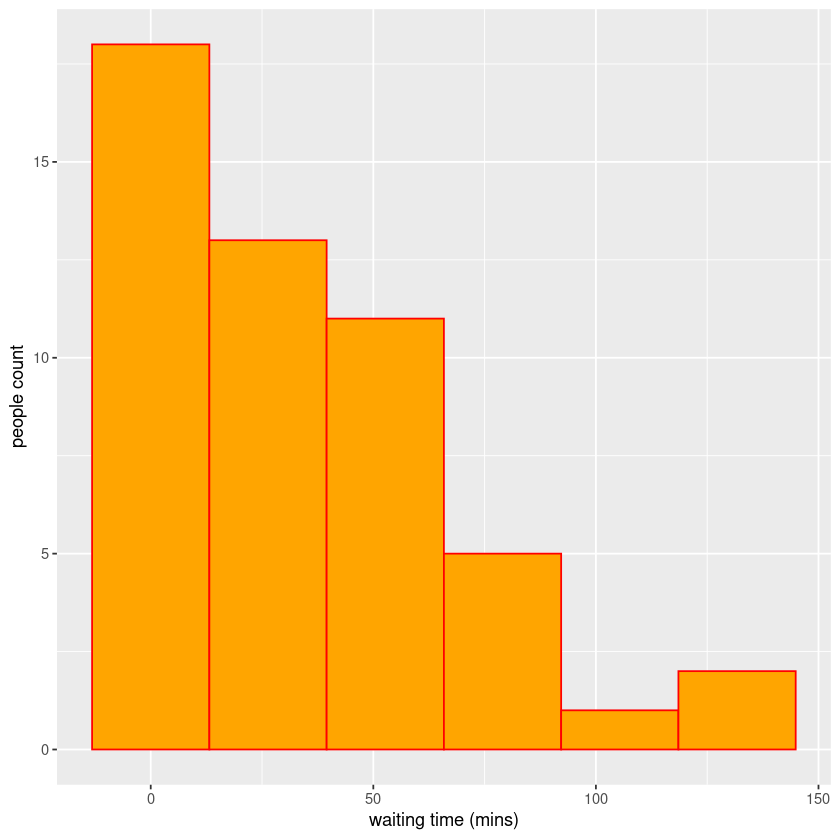

In [5]:
ggplot() + geom_histogram(aes(sim),bins=6,color='red',fill='orange') + labs(x='waiting time (mins)',y='people count')

B) what is the probability that a person will wait for less than 10 minutes ?

In [6]:
# probability that a person will wait less than 10 minutes: it's the integral of the pdf up to 10 minutes
pexp(10,rate)

[1] 0.2834687

C) evaluate the average waiting time from the simulated data and compare it with
the expected value (calculated from theory and by manipulating the probability
distributions using R)

In [7]:
# calculate from simulated data
mean(sim)

# for the exponential pdf, the mean is simply 1/rate:
1/rate

[1] 34.83869

[1] 30

D) what is the probability for waiting more than one hour before being received ?

In [8]:
# it's 1 minus the probability of waiting for up to one hour
1 - pexp(60,rate)

[1] 0.1353353

### Ex 3
let’s suppose that on a book, on average, there is one typo error every three pages.
If the number of errors follows a Poisson distribution, plot the pdf and cdf, and
calculate the probability that there is at least one error on a specific page of the
book

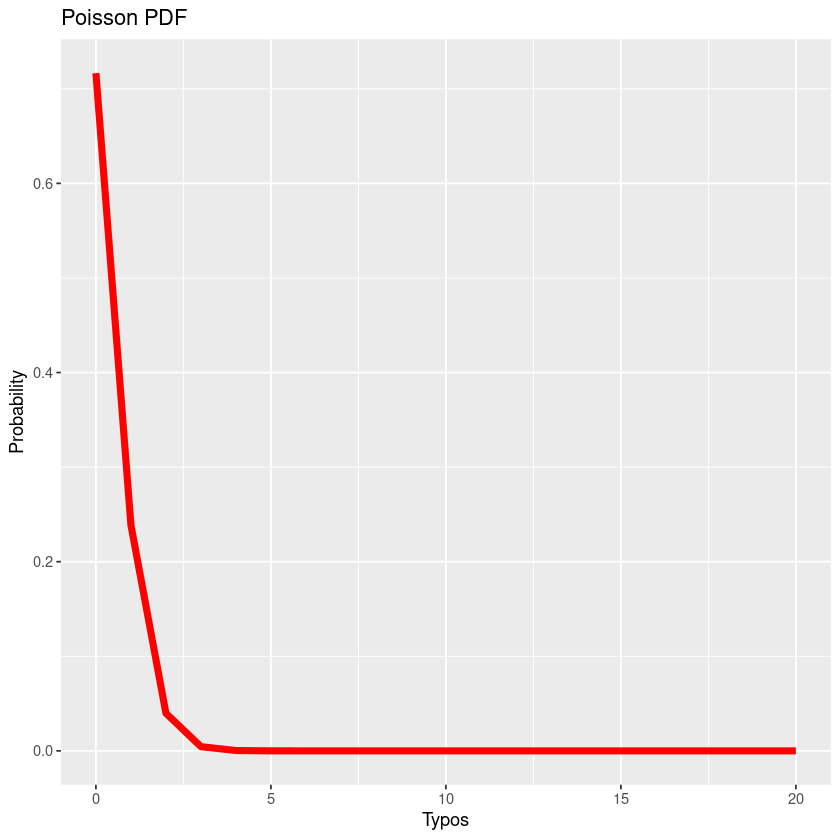

In [9]:
mean_typos <- 1/3 # average number of typos per page

x_pois <- 0:20
y_pois <- dpois(x_pois,mean_typos)

ggplot() + geom_line(aes(x_pois,y_pois) ,color='red',size=2) + labs(x='Typos',y='Probability',title='Poisson PDF')

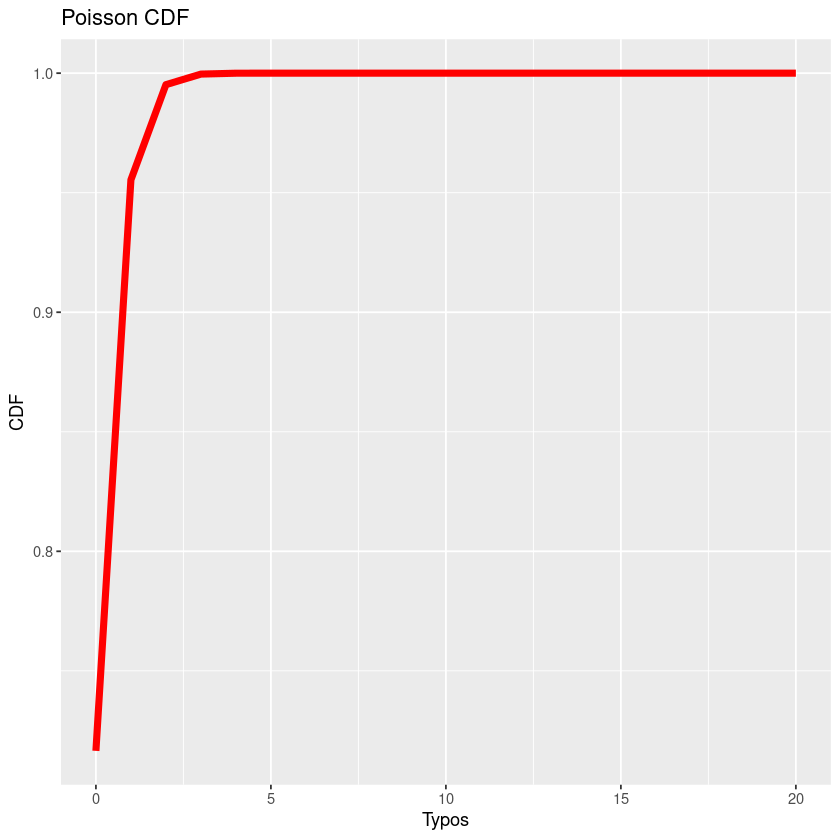

In [10]:
y_poisc <- ppois(x_pois,mean_typos)
ggplot() + geom_line(aes(x_pois,y_poisc) ,color='red',size=2) + labs(x='Typos',y='CDF',title='Poisson CDF')

In [11]:
# assuming that every page is independent, we need to compute the probability of having >=1 typos per page.
# that is, 1-probability of having less than 1 typo per page, which is 1-cdf(0)

probability_1_typo <- 1 - ppois(0,mean_typos)
probability_1_typo

[1] 0.2834687

### Ex 4

we randomly draw cards from a deck of 52 cards, with replacement, until one ace is
drawn. Calculate the probability that at least 10 draws are needed.

In [12]:
p_ace <- 4/52 # is the probability of drawing one ace
p_not_ace <- 1 - p_ace

In [13]:
# if we need 10 draws, that means that the first nine draws are not aces, and then the tenth draw is an ace. since each draw is independent and with replacement:
p_ace_drawn_ten <- p_not_ace^9 *p_ace

p_ace_drawn_ten

[1] 0.03742809

### Ex 5

the time it takes a student to complete a TOLC-I University orientation and evaluation test follows a density function of the form



  $$
  f(t)=
  \begin{cases}
    c(t-1)(2-t) & \text{if $1<t<2$} \\
    0 & \text{otherwise}
  \end{cases}
$$

where t is the time in hours.

a) using the integrate() R function, determine the constant c (and verify it analytically)

In [14]:
pdf_not_normalized <- function(t,c) {
    ifelse(t<2 & t>1,c*(t-1)*(2-t),0)
}

In [15]:
# integrate the function over its support with c=1 to find the value of the integral, and then set c = 1/integral
c_norm <- 1 / integrate(pdf_not_normalized,1,2,c=1)$value
c_norm

[1] 6

This can be easily verified analytically. The integration over the support with $c=1$ yields:
$$
\int_1^2 dt (-t^2 + 3t -2) = \left[ -  \frac{t^3}{3} + \frac{3}{2}t^2 -2t \right]_1^2 = \frac{1}{6}
$$
And thus by fixing $c=6$ the function integrates to 1.

b) write the set of four R functions and plot the pdf and cdf, respectively

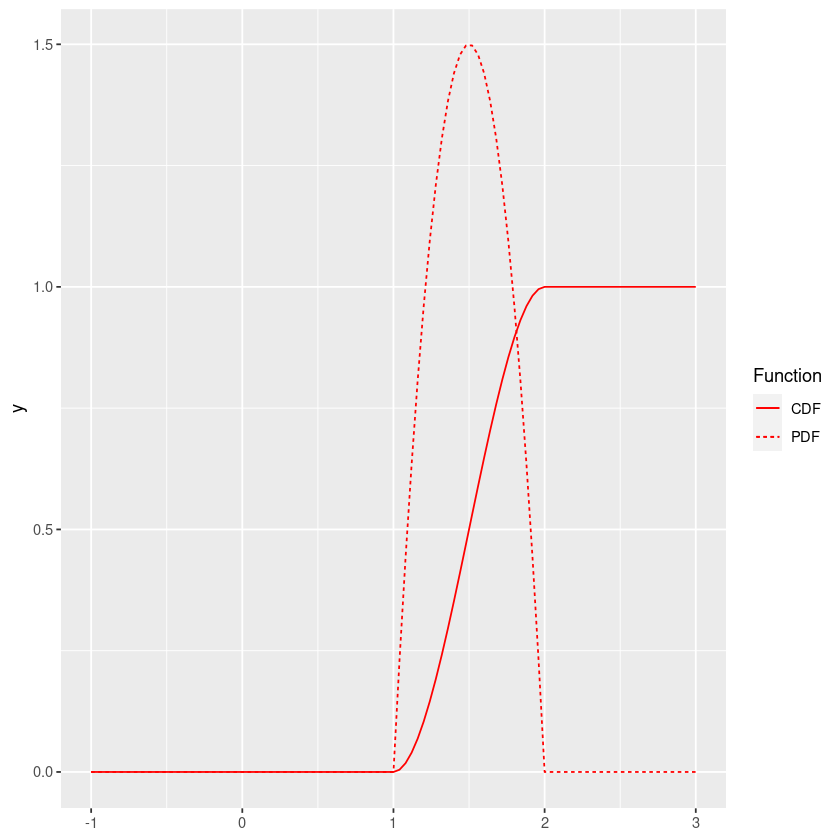

In [16]:
# pdf and cdf

pdf <- function(t) {
    ifelse(t<2 & t>1,6*(t-1)*(2-t),0)
}

cdf <- function(t) {
    return(case_when(
        t < 1 ~ 0,
        t > 2 ~ 1,
        t>=1 & t<=2 ~ (-2*t**3 +9*t**2 -12*t + 5)
    ))
}

base <- ggplot() + xlim(-1,3)
base + geom_function(fun=pdf,color='red',aes(linetype='PDF')) + geom_function(fun=cdf,color='red',aes(linetype='CDF'))+scale_linetype_discrete(name='Function')


In order to implement the quantile function, we need to invert the cumulative distribution function. That means finding the real root of the parametric cubic equation 
$$
-2t^{3} + 9t^2 -12t + 5 = p
$$
The general formula for a cubic equation is
$$
t=-{\frac {b}{3a}}+{\sqrt[{3}]{-{\frac {q}{2}}+{\sqrt {{\frac {q^{2}}{4}}+{\frac {k^{3}}{27}}}}}}+{\sqrt[{3}]{-{\frac {q}{2}}-{\sqrt {{\frac {q^{2}}{4}}+{\frac {k^{3}}{27}}}}}  }
$$

with
$$
k=\frac{c}{a}-\frac{b^2}{3a^2} = -\frac{3}{4}\\
q =\frac{d}{a}-\frac{bc}{3a^2}+\frac{2b^3}{27a^3} = \frac{2p-1}{4}
$$

since the quantities under square root are negative, we need to express the complex conjugates under the cubic root in exponential form:
$$
z = -{\frac {q}{2}}\pm {\sqrt {{\frac {q^{2}}{4}}+{\frac {k^{3}}{27}}}} = \frac{2p-1}{8} \pm i \frac{1}{4}\sqrt{p(1-p)} = \rho e^{i\theta}
$$

with 
$$
\rho^2 = \frac{(2p-1)^2}{4^3} + \frac{p(1-p)}{4^2} = 2^{-6} \\ 
\theta = \cos^{-1} (2p-1)
$$

so
$$
t = -\frac{b}{3a} + \sqrt[3]{z} + \sqrt[3]{\bar{z}} \\ 
\sqrt[3]{z} = 2^{-1} e^{i (\cos^{-1}(2p-1) + n2\pi)/3} \;\;\;\; n=0,1,2
$$
depending on which of the three different cubic roots of z we choose (n=0,1 or 2), we end up with a different root for $t$:

$$
t_n = \frac{3}{2} + \cos \left( \frac{\cos^{-1}(2p-1)+n2\pi}{3}  \right)
$$

The root with $n=2$ corresponds to the value of $t$ ranging between 1 and 2, that is the support of our PDF, and thus we take $t_2(p)$ as the inverse cumulative distirbution function, or the quantile function. 

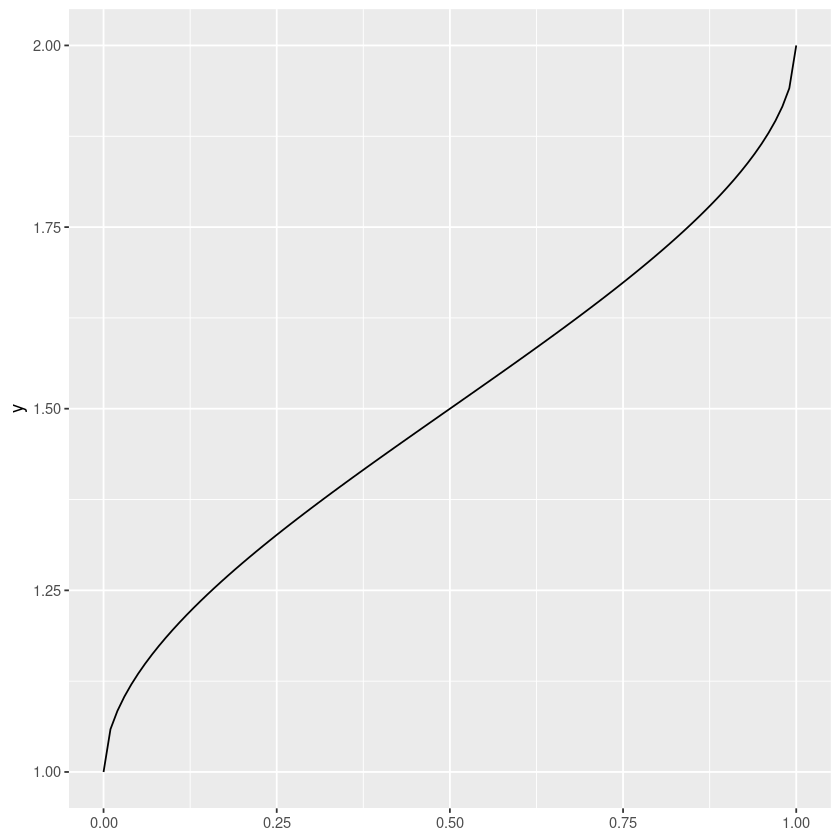

In [17]:
# quantile function
quant <- function(p) {
    return(case_when(
        p == 0 ~ 1,
        p == 1 ~ 2,
        p>=0 & p<=1 ~  1.5 - cos((acos(2*p-1)+2*2*pi)/3)
    ))
}

pq <- ggplot() + xlim(0,1) + geom_function(fun=quant)
pq

Having derived the quantile function, we can now easily implement a random extraction from this distribution by piping a uniform extraction to this function:

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


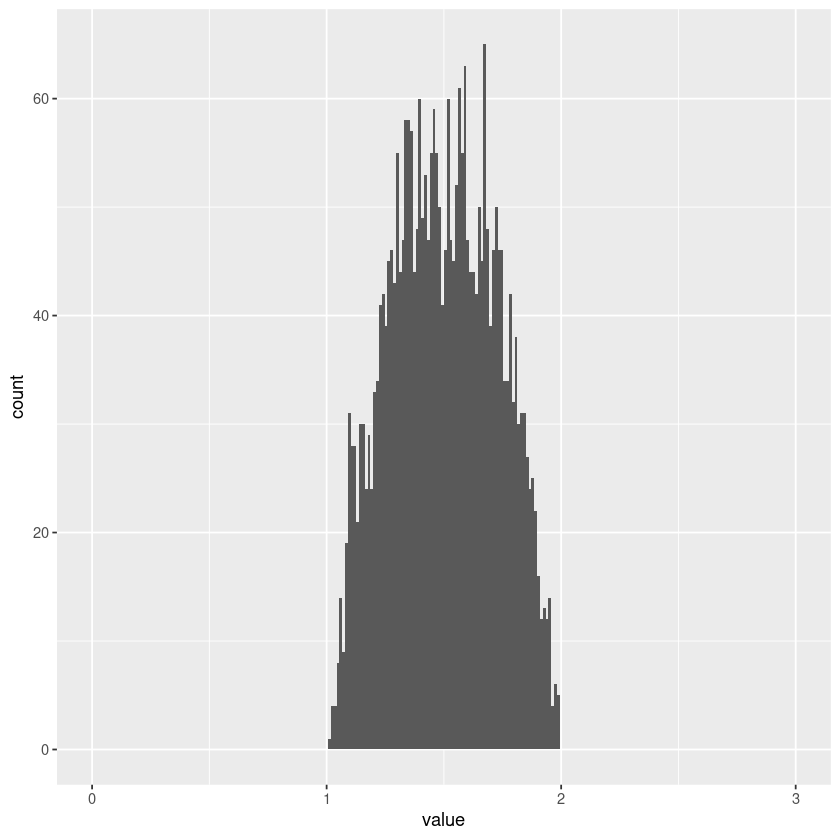

In [18]:
random_extraction <- function(n) {
    quant(runif(n))
}

# lets see if this returns the distribution we expect:

N <- 3000
extractions <- data.frame(value=random_extraction(N))
plot_extraction <- ggplot(extractions,aes(x=value)) + xlim(0,3)  + geom_histogram(bins=250) 

plot_extraction


c) evaluate the probability that the student will finish the aptitude test in more than
75 minutes. And that it will take 90 and 120 minutes.

In [19]:
# the probability of taking more than 75 minutes is 1 - the probability of taking up to 75 minutes, i.e. the cdf for t = 1.25

1 - cdf(1.25)

[1] 0.84375

In [20]:
# this being a probability distribution function, the probability of finishing in exactly 90 or 120 minutes is infinitesimal
# we can evaluate the probability of it lasting between 90 and 90-1 (120 and 120-1)
proba_90_min <- cdf(1.5) - cdf(89/60)
print(proba_90_min)
proba_120_min <- cdf(2) - cdf(119/60)
print(proba_120_min)

# or the probability of it lasting between 90 and 120 minutes

proba90_120 <- cdf(2) - cdf(1.5)
print(proba90_120)


[1] 0.02499074
[1] 0.0008240741
[1] 0.5


### Ex 6

the lifetime of tires sold by an used tires shop is $10^4 x$ km, where x is a random
variable following the distribution funcion


  $$
  f(X)=
  \begin{cases}
    2/x^2 & \text{if $1<x<2$} \\
    0 & \text{otherwise}
  \end{cases}
$$


a) write the set of four R functions and plot the pdf and cdf, respectively

In [21]:
# probability distribution function
pdf_tires <- function(x) {
    ifelse(x<2 & x>1,2/(x^2),0)
}

The CDF can be found analytically via simple integration:
$$
CDF =
\begin{cases}
 \int_1^x dx' \frac{2}{x'^2} = 2 - \frac{2}{x} & \text{if $1<x<2$} \\
 0 & \text{if $x<1$} \\ 
 1 & \text{if $x>2$} 
\end{cases}
$$

And the quantile function, being its inverse:
$$
quant(p) = \frac{-2}{p-2}
$$

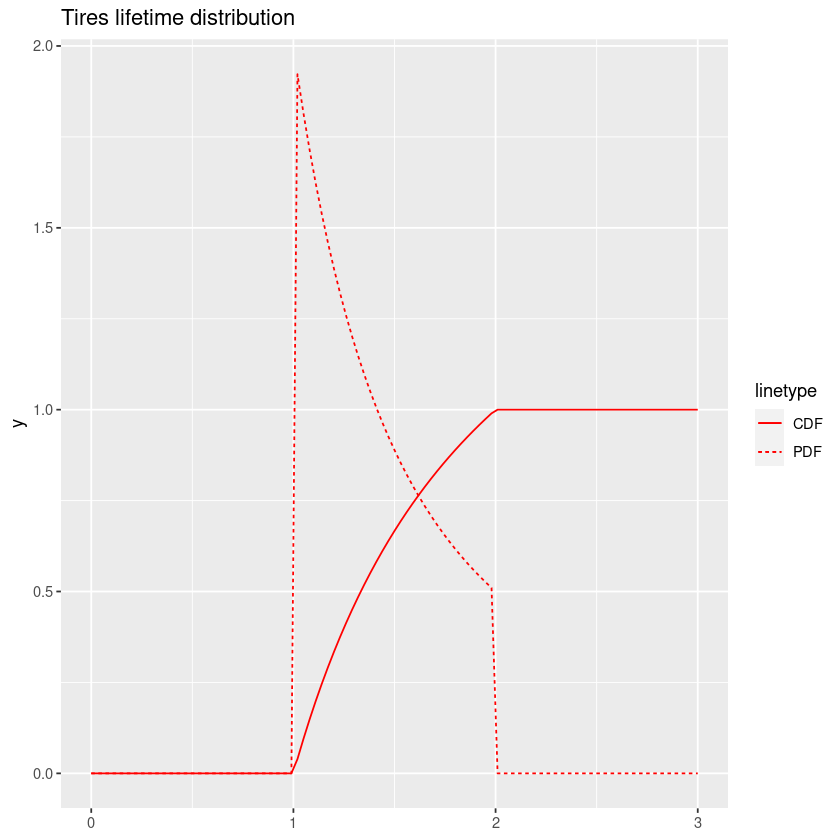

In [22]:
# cumulative distribution function
cdf_tires <- function(x) {
    return(case_when(
        x < 1 ~ 0,
        x > 2 ~ 1,
        x>=1 & x<=2 ~ 2 - 2/x
    ))
}

# quantile function
quant_tires <- function(p) {
    return(case_when(
        p < 0 ~ NaN,
        p > 1 ~ NaN,
        p>=0 & p<=1 ~ (-2)/(p-2)
    ))
}

# extract random number from this distribution using the quantile function

random_tires <- function(n) {
    quant_tires(runif(n))
}
 

# plotting pdf and cdf
plot_tires1 <- ggplot() + xlim(0,3) + geom_function(fun=pdf_tires,color='red',aes(linetype='PDF')) + geom_function(fun=cdf_tires,color='red',aes(linetype='CDF')) + labs(title='Tires lifetime distribution')

print(plot_tires1)

b) determine the probability that tires will last less than 15000 km

In [23]:
# this is simply the CDF up to x=1.5
cdf_tires(1.5)

[1] 0.6666667

c) sample 3000 random variables from the distribution and determine the mean value
and the variance

Warning message:
“Removed 2 rows containing missing values (geom_bar).”


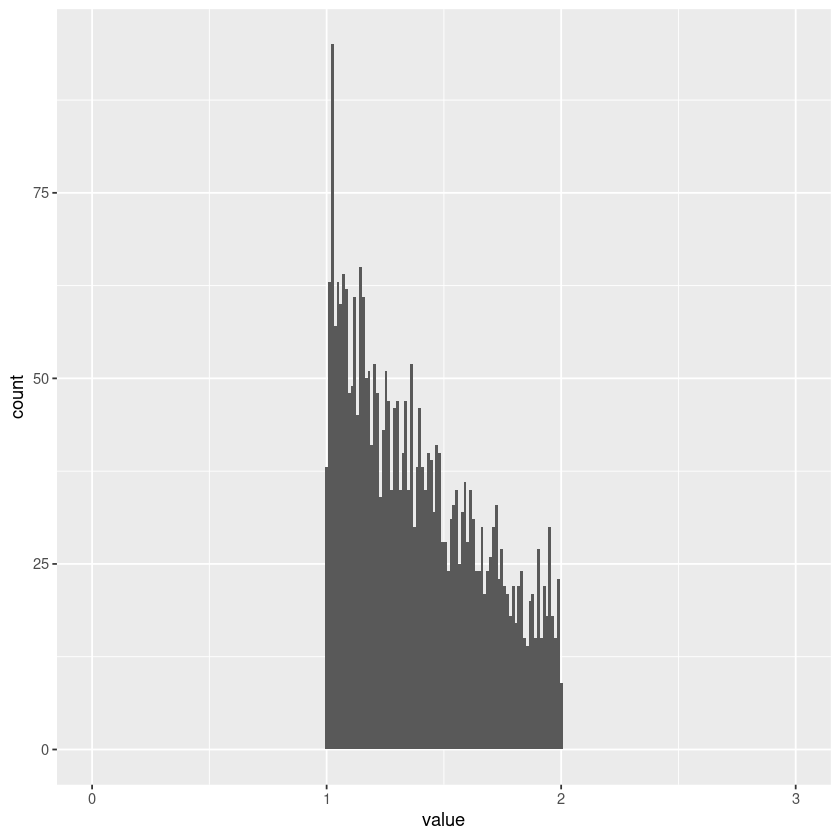

In [24]:
# extracting random numbers and see if they follow the distribution
N <- 3000
extractions <- data.frame(value=random_tires(N))
plot_extraction <- ggplot(extractions,aes(x=value)) + xlim(0,3)  + geom_histogram(bins=250) 

plot_extraction

In [25]:
# now to calculate mean value and variance:
mean(extractions$value)

[1] 1.38993

In [26]:
mean(extractions$value^2) - mean(extractions$value)^2

[1] 0.07807678